***
# Fundamentals of Data Analytics Assessment - CAO Points Analysis

***

<br>

<br>

![img](images/cao_logo.png)

<br>

<br>

Students who wish to study at third level in the Republic of Ireland apply to colleges and universities through the Central Applications Office (CAO) [1]. <i>"The purpose of the Central Applications Office (CAO) is to process centrally applications for undergraduate courses in Irish Higher Education Institutions"</i> [2].
 
<i>“The CAO awards points to students based on their achievements in the Leaving Certificate examination. A student's points are calculated according to these tables (see below), counting their best six subjects only”</i> [3]. A student can study a subject at higher or ordinary level - more points are awarded for higher level papers. Since 2012, the maximum number of points a student can receive is 625 points [3].

<br>

<br>

![img](images/points.jpg)

<br>

The entry points needed for a course is dependent on demand. This means the points requirements for a course varies year on year.  

<br>

This notebook will focus on comparing the CAO points for 2019, 2020 and 2021 and provide an overview of how to load the points from the CAO website into a `pandas` dataframe.

<br>

***
***

<br>

### Importing Libraries 

<br>

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# Working with data
import numpy as np

# For downloading.
import urllib.request as urlrq

# For scraping data from pdf
import camelot

# Unzipping folders 
from zipfile import ZipFile

# To merge csv files into one
import os, glob

# Common string operations
import string as str

<br>

In [2]:
# Visualisation
import matplotlib.pyplot as plt

# Visualisation
import seaborn as sns

# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Selecting a colour scheme.
plt.style.use('ggplot')

# Configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

<br>

In [3]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

<br>

***
****

<br>

## 2021 CAO Points


<br>

***

<br>

### Level 8  
[Link to 2021 CAO points (Level 8)]('http://www2.cao.ie/points/l8.php')

<br>

<br>

As the 2021 points are stored as a html file on the CAO website, we must make a request to the server they are stored on. We can easily do this by using the python requests package which makes HTTP requests easily and simple and "human friendly". <i>"The HTTP request returns a Response Object with all the response data (content, encoding, status, etc)" </i>[4].

<br>

<br>

#### Server Request

<br>

In [4]:
# Get the CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')

# 200 = ok. 404 = error: not found
resp

<Response [200]>

<br>

<br>

#### Save Orignal Dataset


<br>

To save the original `HTML` file from the request we need to create a path in our repository. Using the datetime module we can convert the response request date to the day the request was made.

<br>

In [5]:
# Create a file path for the original data.
pathhtml = 'datasets/cao2021_' + nowstr + '.html'

<br>

<br>

### Webserver Error


<br>

The CAO website throws an error - it tells us to decode in `iso-8859-1` but, this isn't possible as some of the lines includes` \x96 `- a fada - which isn't recognised in `iso-8859-1`. To combat this, we use the decoding standard `cp1252` which includes `\x96` which allows the fada to be understood. 

<br>

Webserver error - server says decode as:

    Content-Type: text/html; charset=iso-8859-1
    
However, one line uses `\x96` which isn't defined in `iso-8859-1`. 

Therefore, a similar decoding standard `cp1252` was used. It is similar but includes  `\x96`

<br>

<br>

In [6]:
# Fixing the webserves wrong encoding
original_encoding = resp.encoding

# Changing to cp1252
resp.encoding = 'cp1252'

<br>

In [7]:
# Save the original html file.
with open(pathhtml, 'w') as f: # Opening path in write mode
    f.write(resp.text)

<br>

<br>

<br>

### Getting The Data


[Link To Regular Expression Documentation]('https://docs.python.org/3/library/re.html')

<br>

To get the relevant lines from the response request, we employ a regular expression. A regular expression <i>"...is a sequence of characters that specifies a search pattern"</i> [5]. You can think of them as a search and find function. We use a regular expression as it more efficient than constantly recalling an expression over and over.

<br>

In [8]:
# Compile regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') # r for raw data

<br>

<br>

We will then use this expression to loop through the response from earlier for any matches of the regular expression and save these matches in a CSV file. 

<br>

In [9]:
# Path to csv file
path2021 = 'datasets/cao2021_csv_' + nowstr + '.csv'

<br>

In [10]:
# Tracking number of courses matched
no_lines = 0



# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5] # i.e first 5 characters
            # The course title.
            course_title = dline[7:57].strip() # Strip gets rid of whitespace
            # Round one points.
            course_points = re.split(' +', dline[60:]) # split into substringd from index 60 
            if len(course_points) != 2: # This is because last course has an extra substring
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

            
            
            
            
# Number of courses matched
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


<br>

<br>

<br>

<br>

In [11]:
# Reading dataframe
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [12]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

<br>

As we know these are all level 8 courses, we will also insert a new column into the dataframe to show this.

<br>

<br>

In [13]:
# Creating a new column at the second index with the value 8
df2021.insert(2, 'level', '8')
df2021

,code,title,level,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,8,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,8,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,8,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,8,321,NaN
4,AL810,Quantity Surveying,8,328,NaN
...,...,...,...,...,...
944,WD211,Creative Computing,8,270,NaN
945,WD212,Recreation and Sport Management,8,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,8,230,230
947,WD231,Early Childhood Care and Education,8,266,NaN


<br>

<br>

<br>

***

<br>

## Level 6/7 Courses

[Link to 2021 level 6 & 7 Courses](http://www2.cao.ie/points/l76.php)

<br>

To retrieve the 2021 level 6 and 7 courses we repeat this process.

<br>

### Server Request

<br>

In [14]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l76.php')

# 200 = ok. 404 = error: not found
resp

<Response [200]>

<br>

<br>

### Save Orignal Dataset



<br>

In [15]:
# Create a file path for the original data.
pathhtml_2 = 'datasets/cao2021_2' + nowstr + '.html'

<br>

<br>

### Webserver Error


<br>

In [16]:
# Fixing the webserves wrong encoding
original_encoding = resp.encoding

# Changing to cp1252
resp.encoding = 'cp1252'

<br>

In [17]:
# Save the original html file.
with open(pathhtml_2, 'w') as f: # Opening path in write mode
    f.write(resp.text)

<br>

<br>

### Getting The Data


<br>

In [18]:
# Compile regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') # r for raw data

<br>

<br>

In [19]:
# Path to csv file
path2021_2 = 'datasets/cao2021_2_csv_' + nowstr + '.csv'

<br>

In [20]:

# Tracking number of courses matched
no_lines = 0



# Open the csv file for writing.
with open(path2021_2, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')


            
# Number of courses matched
print(f"Total number of lines is {no_lines}.")

Total number of lines is 416.


<br>

<br>

In [21]:
# Reading dataframe
df2021_2 = pd.read_csv(path2021_2, encoding='cp1252')

<br>

Unfortunately, the 2021 level 6 and 7 courses aren't distinguished from each other. So, I've decided to insert them as '6/7' under a new column heading 'level'. This will distinguish them from the courses we know for certain are level 8.

<br>

In [22]:
# Creating a new column at the second index
df2021_2.insert(2, 'level', '6/7')
df2021_2

,code,title,level,pointsR1,pointsR2
0,AL605,Music and Instrument Technology,6/7,211,NaN
1,AL630,Pharmacy Technician,6/7,308,NaN
2,AL631,Dental Nursing,6/7,311,NaN
3,AL632,Applied Science,6/7,297,NaN
4,AL650,Business,6/7,AQA,AQA
...,...,...,...,...,...
411,WD188,Applied Health Care,6/7,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,6/7,AQA,262v
413,WD206,Electronic Engineering,6/7,180,NaN
414,WD207,Mechanical Engineering,6/7,172,NaN


<br>

<br>

<br>

***

## 2020 Points
***

https://www.cao.ie/index.php?page=points&p=2020

<br>

Luckily the 2020 points are already available in a excel file. This equates to a simpler workload! Additionally, level 6, 7 and 8 are all included and are clearly marked.

<br>

<br>

In [23]:
# Saving the URL as a variable
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

<br>

### Saving Orginal Data

<br>

We must save a copy of the original file; we do this with the `datetime` module which keeps tabs on when the request was made.

<br>

In [24]:
# Create a file path for original data
pathxlsx = 'datasets/cao2020_' + nowstr + '.xlsx'

<br>

<br>

### Retrieve Data

<br>

To get the data we can use the `Urllib` package. `Urlib` is a <i>"...URL handling module for python. It is used to fetch URLs"</i> [6]. The retrieve method downloads <i>"...the remote data directly to the local [disk]"</i> [7]. 

  <br>

In [25]:
# Getting data
urlrq.urlretrieve(url2020, pathxlsx)

('datasets/cao2020_20211229_173454.xlsx',
 <http.client.HTTPMessage at 0x24c92f12460>)

<br>

<br>

### Loading The Spreadsheet

<br>

We can now load the data into the notebook by using `pandas`. The first 10 lines of the file include a blurb about the CAO so we will skip the first 10 rows to avoid pulling them into the newly created dataframe.

<br>

In [26]:
# Download and parse the excel spreadsheet. First few rows where a blurb
df2020 = pd.read_excel(url2020, skiprows=10)

In [27]:
# Checking the dataframe
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

<br>

<br>

In [28]:
# Checking random row
df2020.iloc[1000]

CATEGORY (i.e.ISCED description)    Engineering and engineering trades
COURSE TITLE                                    Mechanical Engineering
COURSE CODE2                                                     SG333
R1 POINTS                                                          216
R1 Random *                                                        NaN
R2 POINTS                                                          NaN
R2 Random*                                                         NaN
EOS                                                                216
EOS Random *                                                       NaN
EOS Mid-point                                                      347
LEVEL                                                                7
HEI                                     Institute of Technology, Sligo
Test/Interview #                                                   NaN
avp                                                                NaN
v     

<br>

<br>

In [29]:
# -1 is always last row/element
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

<br>

<br>

<br>

<br>

<br>

### Storing The Dataframe

<br>

Storing the dataframe we created with the other files in the project directory. 

<br>

In [30]:
# Creating a path for dataframe
path2020 = 'datasets/cao2020_' + nowstr + '.csv'

<br>

In [31]:
# Saving dataframe to disk
df2020.to_csv(path2020)

<br>

<br>

<br>

<br>

***

## 2019 Points
***



<br>

### Level 8 Courses
https://www.cao.ie/index.php?page=points&p=2019

<br>

The 2019 CAO points are stored in PDF files. Only round 1 points are available for 2019.

<br>

I decided to use the package `Camelot` to extract the data from the files. More information can be found in the `README` file of this projects repository and [the official documentation for Camelot can be found here](https://camelot-py.readthedocs.io/en/master/user/quickstart.html).

`Camelot` has a number of [dependencies](https://camelot-py.readthedocs.io/en/master/user/install-deps.html) which must be installed before the package can be used. I found [this](https://www.youtube.com/watch?v=LoiHI-IB3lY&t=308s) video extremely useful in getting Camelot up and running.

<br>

<br>

### Getting The Data

<br>

In [47]:
# Checking all pages of pdf for data
pdf = camelot.read_pdf('datasets/2019_points.pdf', pages='all')

<br>

In [48]:
# Checking the type
print(type(pdf))

<class 'camelot.core.TableList'>


<br>

<br>

Note: The number of pages in the 2019 level 8 courses PDF is 18.

<br>

In [49]:
# Checking the number of tables found
pdf

<TableList n=18>

<br>

In [50]:
# checking tothe accuracy
pdf[1].parsing_report

{'accuracy': 100.0, 'whitespace': 2.73, 'order': 1, 'page': 2}

<br>

From the parsing report we can see the table was extracted correctly. You can check this with all pages.

<br>

<br>

### Exporting Data

<br>

The next step is to export the data found into a CSV file so we can convert it into a dataframe. 

<br>

In [51]:
# Exporting tables into a csv file
pdf.export('datasets/2019_points.csv', f='csv', compress=True)

<br>

<br>

To unzip the CSV files with use the Zipfile package [8]. 

<br>

In [52]:
# Loop through zipped folder for files
with ZipFile('datasets/2019_points.zip', 'r') as df:
   # Extract all the contents of zip file in current directory
   df.extractall('datasets/2019_points')

<br>

<br>

### Merging CSV Files

<br>

As `camelot` exports each table as a single file, we need to merge them all into one dataframe. We can do this by using the `Glob` module. `Glob`, which stands for global, is part of the standard Python library. 

It is used to <i>"...search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters"</i> [9].

<br>

<br>

In [53]:
# The path to use
path = 'datasets/2019_points/'

<br>

In [54]:
# Find csvs which match this pattern
filelist = glob.glob(path + '2019_*.csv')

# Merge them together with these column headings
df2019 = pd.concat([pd.read_csv(file, names=['code','title','points','median' ]) for file in filelist])

<br>

<br>

<br>

As we know these are all level 8 courses, we will also insert a new column into the dataframe to show this. We will also clean up the dataframe a bit by dropping the old heading and by getting rid of the rows which only contain the name of the third level institutes.

<br>

<br>

In [40]:
# Creating a new column at the second index
df2019.insert(2, 'level', '8')

<br>

In [41]:
# Dropping old heading
df2019.drop(0)

,code,title,level,points,median
1,NaN,Athlone Institute of Technology,8,NaN,NaN
2,AL801,Software Design with Virtual Reality and Gaming,8,304,328
3,AL802,Software Design with Cloud Computing,8,301,306
4,AL803,Software Design with Mobile Apps and Connected...,8,309,337
5,AL805,Network Management and Cloud Infrastructure,8,329,442
...,...,...,...,...,...
50,TR032,Engineering,8,487*,520.0
51,TR033,Computer Science,8,465*,488.0
52,TR034,Management Science and Information Systems Stu...,8,589*,602.0
53,TR035,Theoretical Physics,8,554,601.0


<br>

In [42]:
# Getting rid of rows containing institute names only
df2019 = df2019[df2019['code'].notnull()]

<br>

In [43]:
# Checking last 5 rows
df2019.tail()

,code,title,level,points,median
50,TR032,Engineering,8,487*,520.0
51,TR033,Computer Science,8,465*,488.0
52,TR034,Management Science and Information Systems Stu...,8,589*,602.0
53,TR035,Theoretical Physics,8,554,601.0
54,TR038,Engineering with Management,8,499,543.0


<br>

<br>

<br>

<br>

<br>

***

<br>

### Level 6 & 7 Courses

http://www2.cao.ie/points/lvl76_19.pdf

<br>

To retrieve the 2019 level 6 and 7 courses we repeat this process.

<br>

### Getting The Data

<br>

There are 10 pages in the level 6 and 7 courses PDF.

<br>

In [40]:
# Checking all pages of pdf for data
pdf_2 = camelot.read_pdf('datasets/2019_points_2.pdf', pages='all')

<br>

In [41]:
# Checking the number of tables, should be 10
pdf_2

<TableList n=10>

<br>

<br>

In [42]:
# checking to make sure it worked
pdf_2[3].parsing_report

{'accuracy': 100.0, 'whitespace': 9.26, 'order': 1, 'page': 4}

<br>

<br>

<br>

### Exporting The Data

<br>

<br>

In [43]:
# Exporting tables into a csv file
pdf_2.export('datasets/2019_points_2.csv', f='csv', compress=True)

<br>

<br>

In [44]:
# Unzipping the folder - multiple tables are exported as a zip
# Loop through zipped folder for files
with ZipFile('datasets/2019_points_2.zip', 'r') as df:
   # Extract all the contents of zip file in current directory
   df.extractall('datasets/2019_points_2')

<br>

<br>

### Merging CSV Files

<br>

In [45]:
# Creating a path
path = 'datasets/2019_points_2/'

<br>

<br>

In [46]:
# Find csvs which match this pattern
filelist = glob.glob(path + '2019_*.csv')

# Merge them together with these column headings. Leaving blurb from pdf without skiprows
df2019_2 = pd.concat([pd.read_csv(file, names=['code','title','points','median'], skiprows=10) for file in filelist])

<br>

<br>

Unfortunately, the 2019 level 6 and 7 courses aren't distinguished from each other. In tandem with 2021, I decided to insert them as '6/7' under a new column heading 'level'. This will distinguish them from the courses we know for certain are level 8. Additionally, we will get rid of the rows which only contain the name of the third level institutes.

<br>

<br>

In [51]:
# Creating a new column at the second index
df2019_2.insert(2, 'level', '6/7')

<br>

In [52]:
# Getting rid of rows containing institute names only
df2019_2 = df2019_2[df2019_2['code'].notnull()]

<br>

In [53]:
# Checking pandas dataframe
df2019_2. head()

,code,title,level,points,median
0,AL600,Software Design,6/7,205,306.0
1,AL601,Computer Engineering,6/7,196,272.0
2,AL602,Mechanical Engineering,6/7,258,424.0
3,AL604,Civil Engineering,6/7,252,360.0
4,AL630,Pharmacy Technician,6/7,306,366.0


<br>

<br>

<br>

<br>

<br>

***
## Cleaning Up Dataframes & Data 
***

<br>

Let's clean up our dataframes by choosing the columns we will be using, merging the level 6, 7 and 8 level courses for 2019 and 2021 together and any duplicate values.'

<br>

### 2021

<br>

In [54]:
# Selecting columns level 8
level_8_2021 = df2021[['code', 'title', 'level',  'pointsR1', 'pointsR2']]

<br>

In [55]:
# Selecting columns level 6/7
level_6_2021 = df2021_2[['code', 'title', 'level',  'pointsR1', 'pointsR2']]

<br>

<br>

`Pandas` makes it super simple for us to combine our dataframes by performing concatenation. The `.concat()` method allows us <i>"...to append either columns or rows from one DataFrame to another"</i> [10].

<br>

![img](images/concat.png)

<br>

<br>

In [56]:
# Concatenating level 8 and 6/7 2021 courses
total2021 = pd.concat([level_8_2021, level_6_2021], ignore_index=True)
total2021

,code,title,level,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,8,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,8,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,8,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,8,321,NaN
4,AL810,Quantity Surveying,8,328,NaN
...,...,...,...,...,...
1360,WD188,Applied Health Care,6/7,220,NaN
1361,WD205,Molecular Biology with Biopharmaceutical Science,6/7,AQA,262v
1362,WD206,Electronic Engineering,6/7,180,NaN
1363,WD207,Mechanical Engineering,6/7,172,NaN


<br>

<br>

<br>

### 2020

<br>

As all courses are inculded in the one file for 2020 points we don't need to combine them. We will however create a new dataframe by choosing the column titles we will be using.

<br>

In [57]:
# Selecting coloumns
total2020 = df2020[['COURSE CODE2','COURSE TITLE', 'LEVEL']]

<br>

In [58]:
# Renaming columns
total2020.columns = ['code', 'title', 'level']

<br>

In [59]:
total2020

,code,title,level
0,AC120,International Business,8
1,AC137,Liberal Arts,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",8
3,AD102,Graphic Design and Moving Image Design (portfo...,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,8
...,...,...,...
1459,WD208,Manufacturing Engineering,7
1460,WD210,Software Systems Development,8
1461,WD211,Creative Computing,8
1462,WD212,Recreation and Sport Management,8


<br>

<br>

<br>

### 2019

<br>

In [60]:
# Selecting columns level 8
level_8_2019 = df2019[['code', 'title', 'level', 'points']]

<br>

In [61]:
# Selecting columns level 6/7
level_6_2019 = df2019_2[['code', 'title', 'level', 'points']]

<br>

In [62]:
# Concatenating level 8 and 6/7 2021 courses
total2019= pd.concat([level_8_2019, level_6_2019], ignore_index=True)
total2019

,code,title,level,points
0,Course Code INSTITUTION and COURSE,NaN,8,EOS
1,AL801,Software Design with Virtual Reality and Gaming,8,304
2,AL802,Software Design with Cloud Computing,8,301
3,AL803,Software Design with Mobile Apps and Connected...,8,309
4,AL805,Network Management and Cloud Infrastructure,8,329
...,...,...,...,...
1304,WD173,Hospitality Studies,6/7,182.0
1305,WD174,Tourism,6/7,134.0
1306,WD175,Pharmaceutical Science,6/7,207.0
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7,NaN


<br>

<br>

<br>

<br>

### All Courses

<br>

Now that we have three smaller dataframes for each year, it's time to combine the code, title and level for each year into one. This will enable us to join the points for each year later on.

<br>

In [63]:
# Choosing columns
courses2021 = total2021[['code', 'title', 'level']]
courses2021

,code,title,level
0,AL801,Software Design for Virtual Reality and Gaming,8
1,AL802,Software Design in Artificial Intelligence for...,8
2,AL803,Software Design for Mobile Apps and Connected ...,8
3,AL805,Computer Engineering for Network Infrastructure,8
4,AL810,Quantity Surveying,8
...,...,...,...
1360,WD188,Applied Health Care,6/7
1361,WD205,Molecular Biology with Biopharmaceutical Science,6/7
1362,WD206,Electronic Engineering,6/7
1363,WD207,Mechanical Engineering,6/7


<br>

<br>

<br>

In [64]:
# Choosing column
courses2020 = df2020[['COURSE CODE2','COURSE TITLE', 'LEVEL']]

# Renaming columns
courses2020.columns = ['code', 'title', 'level2020']

courses2020

,code,title,level2020
0,AC120,International Business,8
1,AC137,Liberal Arts,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",8
3,AD102,Graphic Design and Moving Image Design (portfo...,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,8
...,...,...,...
1459,WD208,Manufacturing Engineering,7
1460,WD210,Software Systems Development,8
1461,WD211,Creative Computing,8
1462,WD212,Recreation and Sport Management,8


<br>

<br>

<br>

In [65]:
# Choosing columns
courses2019 = total2019[['code', 'title', 'level']]

# Renaming columns
courses2019.columns = ['code', 'title', 'level2019']

courses2019

,code,title,level2019
0,Course Code INSTITUTION and COURSE,NaN,8
1,AL801,Software Design with Virtual Reality and Gaming,8
2,AL802,Software Design with Cloud Computing,8
3,AL803,Software Design with Mobile Apps and Connected...,8
4,AL805,Network Management and Cloud Infrastructure,8
...,...,...,...
1304,WD173,Hospitality Studies,6/7
1305,WD174,Tourism,6/7
1306,WD175,Pharmaceutical Science,6/7
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7


<br>

<br>

In [66]:
# Dropping old header row
courses2019.drop(0)

,code,title,level2019
1,AL801,Software Design with Virtual Reality and Gaming,8
2,AL802,Software Design with Cloud Computing,8
3,AL803,Software Design with Mobile Apps and Connected...,8
4,AL805,Network Management and Cloud Infrastructure,8
5,AL810,Quantity Surveying,8
...,...,...,...
1304,WD173,Hospitality Studies,6/7
1305,WD174,Tourism,6/7
1306,WD175,Pharmaceutical Science,6/7
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7


<br>

<br>

<br>

In [67]:
# Combining the above into one
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)

<br>

In [68]:
# Sorting values in ascending by the code column
allcourses.sort_values('code')

allcourses

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,8,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,8,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,8,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,8,NaN,NaN
4,AL810,Quantity Surveying,8,NaN,NaN
...,...,...,...,...,...
4133,WD173,Hospitality Studies,NaN,NaN,6/7
4134,WD174,Tourism,NaN,NaN,6/7
4135,WD175,Pharmaceutical Science,NaN,NaN,6/7
4136,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",NaN,NaN,6/7


<br>

<br>

As we can see above there are duplicate rows i.e., courses which have ran in multiple years, so they appear more than once. Let's get rid of these duplicates.

<br>

In [69]:
# Finding duplicate rows
allcourses[allcourses.duplicated()]

,code,title,level,level2020,level2019


<br>

In [70]:
# Dropping duplicates
allcourses.drop_duplicates()

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,8,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,8,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,8,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,8,NaN,NaN
4,AL810,Quantity Surveying,8,NaN,NaN
...,...,...,...,...,...
4133,WD173,Hospitality Studies,NaN,NaN,6/7
4134,WD174,Tourism,NaN,NaN,6/7
4135,WD175,Pharmaceutical Science,NaN,NaN,6/7
4136,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",NaN,NaN,6/7


<br>

In [71]:
# Dropping duplicates which shared a code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

allcourses

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,8,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,8,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,8,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,8,NaN,NaN
4,AL810,Quantity Surveying,8,NaN,NaN
...,...,...,...,...,...
1761,SG403,Applied Archaeology,NaN,NaN,6/7
1762,SG432,Environmental Protection,NaN,NaN,6/7
1763,TL712,Computing with Digital Media,NaN,NaN,6/7
1764,TL719,Culinary Arts,NaN,NaN,6/7


<br>

<br>

When `inplace = True`, data is modified in place [11].

<br>

<br>

***
## Joining Points and Levels
***

<br>

<br>

When a dataframe is made up of more than one dataframe we can set/change the index of this dataframe using pandas.

<i>"[An] Index is like an address, that’s how any data point across the dataframe or series can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names"</i> [12]. 

As the 2019 points data doesn't include round 2 points data, I've decided against using them for this analysis. We will only be using the round 1 points.


<br>

<br>

In [72]:
# Setting the index as the code column
total2021.set_index('code', inplace=True)

# Column headings
total2021.columns = ['title', 'level', 'points_r1_2021', 'points_r2_2021']

<br>

In [73]:
# Setting the index of allcourses as the code column
allcourses.set_index('code', inplace=True)

<br>

<br>

<i>"`join()` is an object function that lives on your DataFrame"</i> [13]. By using .`join()`, it allows you choose which dataframe to join on. By default, pandas does a left join. 

<br>

![img](images/join.webp)

<br>

The next step is to join the points from each year to our dataframe which contains the course code and title.

<br>

In [74]:
# Joining 2021 points to the dataframe 
allcourses = allcourses.join(total2021[['points_r1_2021']])

<br>

<br>

In [75]:
# Getting columns with points
df2020_r1 = df2020[['COURSE CODE2', 'LEVEL', 'R1 POINTS', 'R2 POINTS']]

# Changing titles
df2020_r1.columns = ['code', 'level' ,'points_r1_2020', 'points_r2_2020']


<br>

<br>

In [76]:
# Setting the index as the code column
df2020_r1.set_index('code', inplace=True)

<br>

<br>

In [77]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1, rsuffix='level2020')

<br>

<br>

By passing, in this case - `rsuffix` (right suffix), we're specifying <i>"...a suffix to add to any overlapping columns"</i> [14]. On the above join an error is thrown if the suffix isn't specified. We repeat for 2019 points.

<br>

<br>

In [78]:
# Getting columns with points
df2019_r1 = total2019[['code', 'points', 'level']]

# Changing titles
df2019_r1.columns = ['code', 'points_r1_2019', 'level_2019']

<br>

In [79]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)

<br>

In [80]:
# Join 2019 points to allcourses
allcourses = allcourses.join(df2019_r1, rsuffix='2019')

<br>

In [81]:
# Dropping columns not using
allcourses = allcourses.drop(['level2020', 'level2019', 'points_r2_2020'], axis=1)

<br>

In [82]:
allcourses

,title,level,points_r1_2021,levellevel2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,8,300,8.0,303,304,8
AL802,Software Design in Artificial Intelligence for...,8,313,8.0,332,301,8
AL803,Software Design for Mobile Apps and Connected ...,8,350,8.0,337,309,8
AL805,Computer Engineering for Network Infrastructure,8,321,8.0,333,329,8
AL810,Quantity Surveying,8,328,8.0,319,307,8
...,...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,NaN,NaN,297,6/7
SG432,Environmental Protection,NaN,NaN,NaN,NaN,279,6/7
TL712,Computing with Digital Media,NaN,NaN,NaN,NaN,243.0,6/7


<br>

<br>

In [83]:
# Renaming the columns
allcourses.rename(columns={'level':'level_2021', 'levellevel2020': 'level_2020'}, inplace=True)

<br>

<br>

In [84]:
# Checking random course
allcourses.loc['CI001'] # Code is the index 

title             Counselling Skills and Psychotherapy Studies
level_2021                                                 NaN
points_r1_2021                                             NaN
level_2020                                                 7.0
points_r1_2020                                             300
points_r1_2019                                             238
level_2019                                                 6/7
Name: CI001, dtype: object

<br>

<br>

<br>

In [85]:
# Checking random rows
allcourses.iloc[800:810, 0:7]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
LM123,Biological and Chemical Sc. (Biosci/Envir Sci/Ind,8,498*,8.0,441,412,8
LM124,Mathematics (Math Science/Maths and Physics/Ec...,8,455,8.0,437,427,8
LM125,Physics (Applied Physics or Mathematics and Ph...,8,489,8.0,404,405,8
LM150,General Nursing,8,498*,8.0,475,440*,8
LM152,Mental Health Nursing,8,478,8.0,419,388,8
LM154,Intellectual Disability Nursing,8,462,8.0,420,381*,8
LM156,Midwifery,8,521*,8.0,469,429,8
MU001,Theology and Arts,8,294,8.0,290,290,8
MU002,Theology,8,NaN,8.0,440,292,8


<br>

<br>

<br>

<br>

### Changing DataType
***

<br>

In [86]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, AL801 to TL746
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1765 non-null   object 
 1   level_2021      1365 non-null   object 
 2   points_r1_2021  1336 non-null   object 
 3   level_2020      1464 non-null   float64
 4   points_r1_2020  1437 non-null   object 
 5   points_r1_2019  1297 non-null   object 
 6   level_2019      1309 non-null   object 
dtypes: float64(1), object(6)
memory usage: 174.9+ KB


<br>

<br>

As mentioned earlier, the 2020 points do provide the level for each course. The levels are saved as an integer. As we had to add our own levels into 2021 and 2019, where '6/7' was used. So, I am going to convert the level column values into a string type to match 2019 and 2021.

<br>

<br>

In [87]:
# Converting level column values into strings
allcourses['level_2020'] = allcourses['level_2020'].astype('string')

<br>

<br>

As we can see above the datatype that the points are saved as strings. We need to change this into a numerical value so we can perform statistical operations such as - max, min, mean, etc. - on the data. 

Some of the points values have special characters next to them to indicate extra elements - interview, portfolio, etc. - required for a course. We need to remove these characters before we can covert the strings to numeric values, an error is thrown if not. 

Note: 2020 points don't contain special characters in the same cell as points.

<br>

<br>

In [89]:
# 2021 points
allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace(r'\D', '', regex=True)

# 2019 points
allcourses['points_r1_2019'] = allcourses['points_r1_2019'].str.replace(r'\D', '', regex=True)

<br>

<br>

In [90]:
# Checking a courses which previously had a special character
allcourses.loc['CR125']

title             Popular Music at CIT Cork School of Music
level_2021                                                8
points_r1_2021                                         1028
level_2020                                              8.0
points_r1_2020                                         1088
points_r1_2019                                          972
level_2019                                                8
Name: CR125, dtype: object

<br>

<br>

In [91]:
# Converting points columns to numeric values
cols = ['points_r1_2021', 'points_r1_2020', 'points_r1_2019']
allcourses[cols] = allcourses[cols].apply(pd.to_numeric, errors='coerce', axis=1)

<br>

<br>

In [92]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, AL801 to TL746
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1765 non-null   object 
 1   level_2021      1365 non-null   object 
 2   points_r1_2021  1317 non-null   float64
 3   level_2020      1464 non-null   string 
 4   points_r1_2020  1387 non-null   float64
 5   points_r1_2019  1227 non-null   float64
 6   level_2019      1309 non-null   object 
dtypes: float64(3), object(3), string(1)
memory usage: 174.9+ KB


<br>

<br>

<br>

<br>

***
## Data Analysis
***

<br>

<br>

![img](images/covid.jpg)

<br>

<br>

Before we start with a points comparison, it is important to note the impact Covid-19 had on the leaving certificate and CAO points. 

On the 21st of May 2020, the government announced that due to medical evidence the leaving certificate exam would be cancelled [15]. In its place students were offered the option of calculated grades or to sit the exam at a later date. In figures released by The Department of Education revealed over 98% students had registered for calculated grades [16].

In 2021, students again had the option of sitting exams, receiving accredited grades or a mixture of both [17]. 

There was an overall concern that accredited grades along with a record number of applicants would drive up CAO points for courses across the board. Let’s investigate if that was indeed the case.

<br>

<br>

<br>

In [93]:
# Overview 
allcourses.describe()

,points_r1_2021,points_r1_2020,points_r1_2019
count,1317.000000,1387.000000,1227.000000
mean,361.665148,350.217015,340.366748
std,139.025919,134.311616,132.806330
min,57.000000,55.000000,55.000000
25%,260.000000,252.000000,252.000000
50%,325.000000,316.000000,307.000000
75%,462.000000,430.500000,409.500000
max,1028.000000,1088.000000,979.000000


<br>

We can use the `.groupby()` method to group <i>"...the data according to the categories and apply a function to the categories"</i> [24]. We can then use various aggregate functions to analyse the data.

We'll use the course levels provided by 2020 as we know these are correctly labelled.


<br>

In [94]:
# Columns to use
c = ['points_r1_2019', 'points_r1_2020', 'points_r1_2021']

# Groupby
allcourses.groupby(['level_2020'])[c].agg([np.mean, np.std, np.min, np.max])

points_r1_2019                           points_r1_2020  \
                     mean         std   amin   amax           mean   
level_2020                                                           
6.0            227.586957   71.481956  128.0  454.0     235.283784   
7.0            238.588889   98.528888  100.0  700.0     245.714286   
8.0            384.831836  127.853080   55.0  979.0     393.800813   

                                      points_r1_2021                     \
                   std   amin    amax           mean         std   amin   
level_2020                                                                
6.0          69.185183  149.0   473.0     243.724638   88.867364  120.0   
7.0          88.084202  100.0   781.0     256.902280   99.383937  100.0   
8.0         126.253491   55.0  1088.0     408.978261  127.961471   57.0   

                    
              amax  
level_2020          
6.0          502.0  
7.0          775.0  
8.0         1028.0

<br>

Just from this quick overview, we can see that points have increased over the years. 

<br>

<br>

In [95]:
# Number of courses titles
allcourses['title'].count()

1765

<br>

<br>

There are 1765 courses in our dataframe. It's important to note that this does not mean there was 1765 courses available to candidates each year. The number of courses varies year on year. If there's low demand for courses, they may cease that and subsequent years. Additionally, new courses may be added. E.g., a course that was available in 2019 may not be running in 2020.

<br>

<br>

In [96]:
# Breakdown of 2019 courses
allcourses['level_2019'].value_counts()

8      931
6/7    378
Name: level_2019, dtype: int64

<br>

<br>

In [97]:
# Breakdown of 2020 courses
allcourses['level_2020'].value_counts()

8.0    1027
7.0     346
6.0      91
Name: level_2020, dtype: Int64

<br>

<br>

In [98]:
# Breakdown of 2021 courses
allcourses['level_2021'].value_counts()

8      949
6/7    416
Name: level_2021, dtype: int64

<br>

<br>

Let's visualise these numbers using a count plot.

<br>

<AxesSubplot:xlabel='level_2021', ylabel='count'>

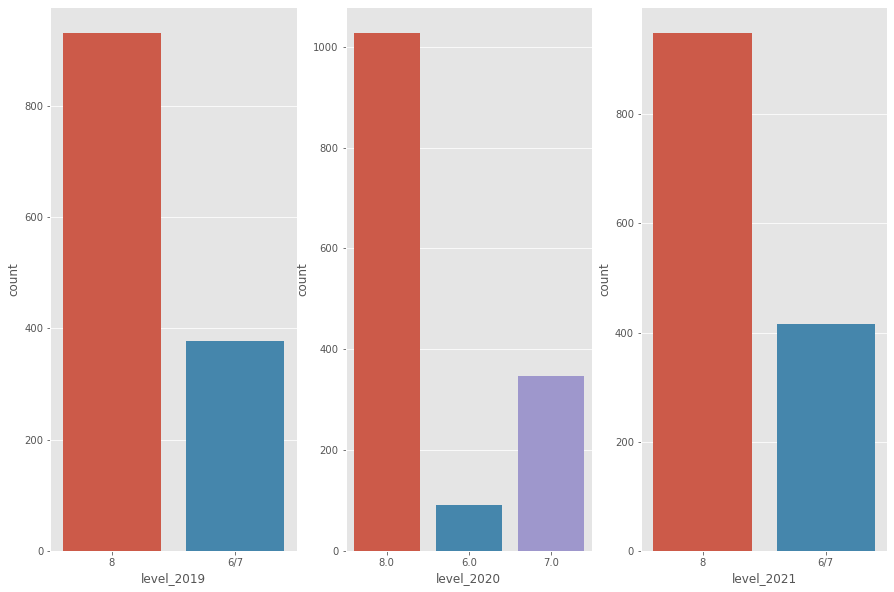

In [99]:
# Figure Size
plt.rcParams['figure.figsize'] = (15, 10)

# Generating a countplot for each year

# nrows, ncols, the first plot
plt.subplot(1,3,1)
sns.countplot(x='level_2019', data=allcourses)

# nrows, ncols, the second plot
plt.subplot(1,3,2)
sns.countplot(x='level_2020', data=allcourses)

# nrows, ncols, the thrid plot
plt.subplot(1,3,3)
sns.countplot(x='level_2021', data=allcourses)


<br>

<br>

<br>

2020 was the year which offered students the greatest number of courses.

<br>

<br>

In [100]:
# Average number of points 2020
allcourses['points_r1_2020'].mean()

350.21701514059123

<br>

<br>

<br>

Next, let's take a look at the points. 

<br>

<br>

#### KDE Plot

<br>

<i>"A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset"</i> [18].

The KDE plot is generated by <i>“…drawing a small continuous curve (also called kernel) for every individual data point along an axis, all of these curves are then added together to obtain a single smooth density estimation”</i> [19].

To generate the KDE plot we can use `pandas` built in visualisation `.plot()`. This method is a wrapper for `pyplot.plot()` and the result is a graph identical to the one you produced with `Matplotlib` [23].

<br>

([<matplotlib.axis.XTick at 0x2c526555e80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

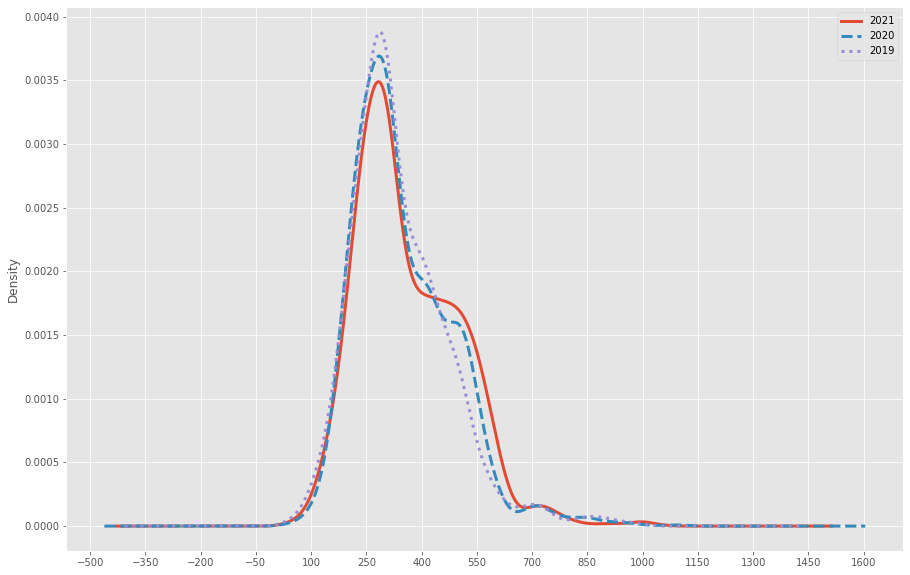

In [101]:
# Generating a kde plot for points 
allcourses['points_r1_2021'].plot.kde(label='2021', linestyle='-', linewidth=3)
allcourses['points_r1_2020'].plot.kde(label='2020', linestyle='--', linewidth=3)
allcourses['points_r1_2019'].plot.kde(label='2019', linestyle=':', linewidth=3)

# Adding a legend
plt.legend()

# Adding ticks to xaxis
plt.xticks(np.arange(-500, 1650, step=150))

<br>

<br>

From the above plot we can see that the majority of courses require in and around 300 points.

<br>

<br>

<br>

#### Pairplot

<br>

We can use a pair plot to plot any pairwise relationships in our data [20]. I'm going to use the 2020 level as the hue as it is the only year, we know for sure which course is a level 6 or 7.

<br>

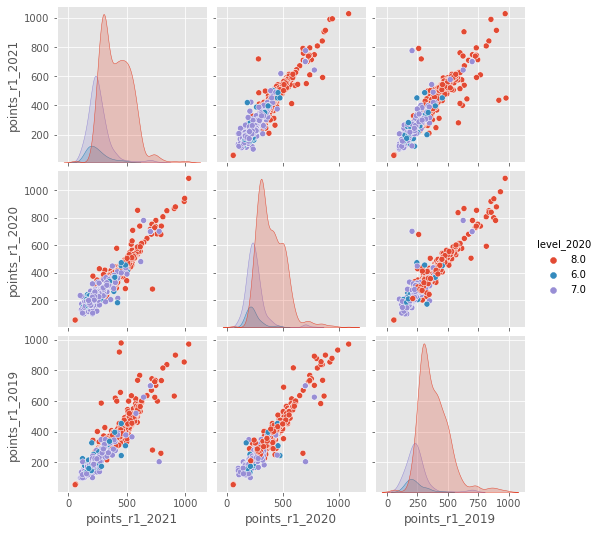

In [102]:
# Generating a pairplot
sns.pairplot(data=allcourses, hue='level_2020')

<br>

<br>

We can see there are some outliers in the data, and we will look at the further on. Another observation is that there seems to be the most difference between 2019. I would expect this as 2019 whereas a direct result of the written exams and 2021 was the second year accredited grades where an option.

<br>

<br>

### Top 10 Highest Course Points Per Year

<br>

We can do sort a column in ascending or descending order by using the pandas method `.sort_values()` [21].

<br>

### 2019

<br>

In [103]:
# Top 10 course points by 2019
allcourses.sort_values(by=['points_r1_2019', 'title'], ascending=False).head(10)

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CR210,Contemporary Applied Art (Ceramics Glass Tex...,8,450.0,8.0,NaN,979.0,8
CR125,Popular Music at CIT Cork School of Music,8,1028.0,8.0,1088.0,972.0,8
DL834,Film and Television Production,NaN,NaN,8.0,990.0,933.0,8
CR225,Photography with New Media at CIT Crawford Col...,8,435.0,8.0,NaN,920.0,8
LC114,Fashion and Textiles for Product and Costume (...,8,914.0,8.0,880.0,900.0,8
DL831,Design for Stage and Screen (Production Design),NaN,NaN,8.0,781.0,893.0,8
DL830,Design for Stage and Screen (Character Makeup ...,NaN,NaN,8.0,939.0,879.0,8
CR126,Popular Music: Drums at CIT Cork School of Music,NaN,NaN,8.0,801.0,878.0,8
CR129,Popular Music: Voice at CIT Cork School of Music,NaN,NaN,8.0,841.0,857.0,8


<br>

<br>

Some observations:

- Unsurprisingly, the top 10 consists of level 8 courses.
- Half of 2019's (5) courses with top points, have been dropped in 2021. 
- I find the trajectory of 2019's top course - CR210 - interesting. It seems to have been either dropped in 2020 or an alternative method of selecting students was employed following Covid uncertainty. Additionally, there is a massive drop in points required for 2021. Below I will work out how much of a decrease in points this is.

<br>

<br>

In [104]:
# Finding the % decrease
points_2021 = 450
points_2019 = 979

decrease = points_2019 - points_2021

decrease / points_2019 * 100

54.03472931562819

<br>

There is a 54% decrease in 2019's top course in 2021.

<br>

You probably notice that these top 10 courses exceed the limit of 625 points which is the maximum a student can be awarded in sitting/accredited in the exam. Thus, meaning these courses required additional entry requirements such as interview, portfolio, audition. 

Let's see what the top courses based solely on points the maximum points a student can score on exams only. There's a good chance this will also filter out the major outliers seen in the pair plot above.

<br>

<br>

In [105]:
# Top 10 courses <= 625 points
top_2019 = allcourses[allcourses.points_r1_2019 <= 625].sort_values('points_r1_2019',ascending=False)

# Filtering out courses which contain '('
top_2019[~top_2019.title.str.contains('\(')].head(15)

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CR220,Fine Art at CIT Crawford College of Art and De...,8,400.0,8.0,NaN,620.0,8
DN670,Economics and Finance,8,625.0,8.0,613.0,601.0,8
CK702,Dentistry,8,625.0,8.0,613.0,590.0,8
TR052,Dental Science,8,625.0,8.0,613.0,590.0,8
TR034,Management Science and Information Systems Stu...,8,625.0,8.0,613.0,589.0,8
CR600,Visual Communications at CIT Crawford College ...,8,280.0,8.0,NaN,587.0,8
CR127,Popular Music: Electric Guitar at CIT Cork Sch...,NaN,NaN,8.0,838.0,584.0,8
DL827,Art,8,574.0,8.0,572.0,583.0,8
DN230,Actuarial and Financial Studies,8,613.0,8.0,601.0,577.0,8


<br>

That looks a lot better. I've chosen to look at the top 15 course points as I did some research and - CR220, CR600, CR127, DL827 - require an interview, portfolio or audition but as this wasn't included in the title they are included in the filter.

<br>

- Although it required additional requirements the trajectory of CR220 is interesting. It went from commanding 620 points in 2019, not being offered in 2020 and then dropping a massive 180 points for 2021.
- Another huge drop was CR220. The top course (inc. additional requirements) required 620 points in 2019. The course wasn't offered in 2020. It was offered again in 2021 but with a massive 307 point drop, now requiring 400 points.
- 3 of 2019's top courses are no longer offered in 2021. 
- For 3/4 of the courses which had extra requirements all had a big drop in points in 2021. 
- For the most part there does seem to have been a points inflation since the move to accredited grades. We will work out the percentage later on.

<br>

<br>

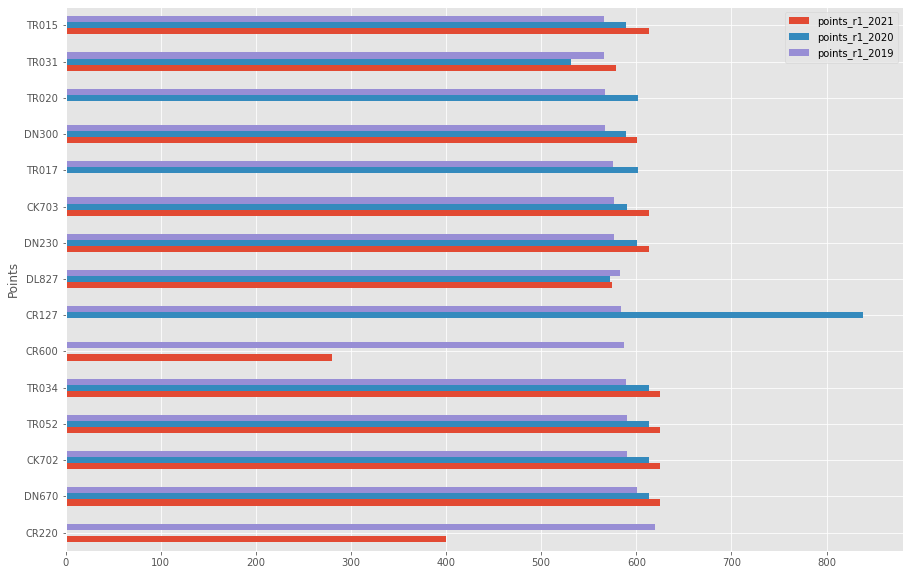

In [106]:
# Generating a barplot 
top_2019[~top_2019.title.str.contains('\(')].head(15).plot.barh()

# Labeling y-axis
plt.ylabel('Points')


# Adding a legend
plt.legend(loc='upper right')

<br>

<br>

<br>

Let's have a look at the last 5 rows i.e., courses which require the least amount of points.

<br>

In [107]:
# Last 5 rows
top_2019.tail()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DB576,Film and Creative Media,6/7,101.0,7.0,NaN,100.0,6/7
RC101,Medicine - Graduate Entry (GAMSAT required),8,NaN,8.0,NaN,60.0,8
DN401,Medicine - Graduate Entry (GAMSAT required),8,61.0,8.0,NaN,59.0,8
CK791,Medicine - Graduate Entry (GAMSAT required),8,60.0,8.0,57.0,58.0,8
LM101,Medicine - Graduate Entry (GAMSAT required),8,57.0,8.0,55.0,55.0,8


<br>

<br>

The bottom 4 courses are quite misleading. All these courses require a GAMSAT*.

*Graduate Medical School Admissions Test (GAMSAT) <i>"is a standardised exam designed, scored and developed by ACER to assist in the admissions of students to graduate-entry programmes (medicine, dentistry, optometry, pharmacy, podiatry) open to graduates of any discipline. GRADUATE ENTRY IRISH MEDICAL SCHOOLS. There are 4 medicals schools in Ireland which require the GAMSAT as part of their admissions criteria."</i> [34].

<br>

Considering we now know that in 2019, the first course without an additional requirement starts at 601 points and the last being 100 points. Let's use these as the benchmarks to get an overall summary of the data. I think this will give us a fairer view of the data.

<br>

In [108]:
# Overview of 2019 points
stats_19 = allcourses[(allcourses['points_r1_2019'] >= 100) & (allcourses['points_r1_2019'] <= 601) ].describe().drop(['points_r1_2021', 'points_r1_2020'], axis=1)

stats_19

,points_r1_2019
count,1179.000000
mean,326.059372
std,106.001361
min,100.000000
25%,251.000000
50%,307.000000
75%,401.000000
max,601.000000


<br>

<br>

<br>

### 2020

<br>

<br>

In [109]:
# Top 10 courses <= 625 points
top_2020 = allcourses[allcourses.points_r1_2020 <= 625].sort_values('points_r1_2020',ascending=False)

# Filtering out courses which contain '('
top_2020[~top_2020.title.str.contains('\(')].head(15)

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CK702,Dentistry,8,625.0,8.0,613.0,590.0,8
TR034,Management Science and Information Systems Stu...,8,625.0,8.0,613.0,589.0,8
TR052,Dental Science,8,625.0,8.0,613.0,590.0,8
DN670,Economics and Finance,8,625.0,8.0,613.0,601.0,8
TR020,Law and Political Science,NaN,NaN,8.0,602.0,567.0,8
TR017,Law and Business,NaN,NaN,8.0,602.0,576.0,8
DN230,Actuarial and Financial Studies,8,613.0,8.0,601.0,577.0,8
DN440,Biomedical Health and Life Sciences,8,613.0,8.0,590.0,565.0,8
CK703,Pharmacy,8,613.0,8.0,590.0,577.0,8


<br>

<br>

Some observations:

- Once again it is level 8 courses which occupy the top 15 places. 
- None of the top 15 courses (after filtering) have additional requirements.
- All 15 courses where pre-existing i.e., they have ran for at least one year.
- Points for all 15 courses increased. 

<br>

<br>

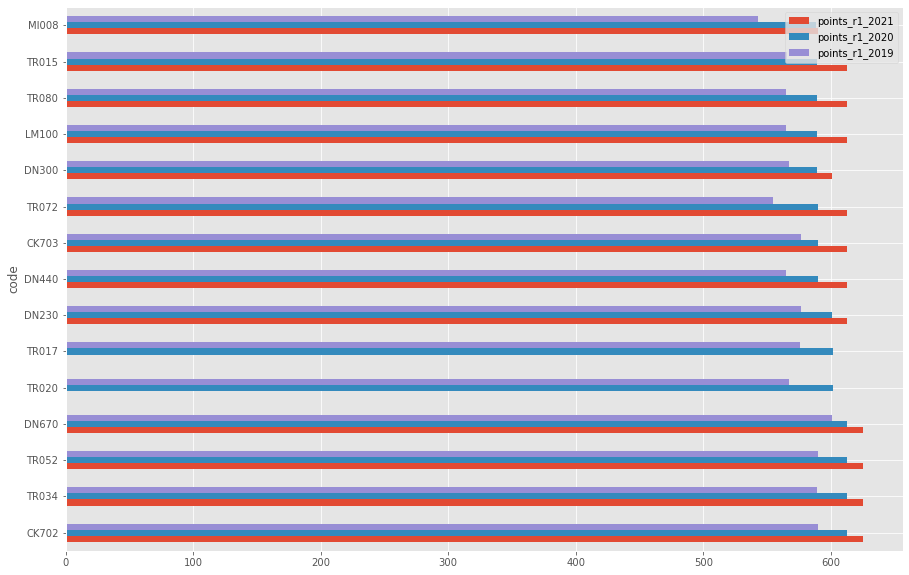

In [110]:
# Generating a barplot 
top_2020[~top_2020.title.str.contains('\(')].head(15).plot.barh()

# Adding a legend
plt.legend(loc='upper right')

<br>

<br>

<br>

In [111]:
# Last 5 rows
top_2020.tail()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
TU792,Community and Youth Development,6/7,NaN,7.0,101.0,NaN,NaN
DK712,Digital Marketing and Public Relations,6/7,206.0,7.0,100.0,147.0,6/7
CR035,Community Development,6/7,133.0,7.0,100.0,162.0,6/7
CK791,Medicine - Graduate Entry (GAMSAT required),8,60.0,8.0,57.0,58.0,8
LM101,Medicine - Graduate Entry (GAMSAT required),8,57.0,8.0,55.0,55.0,8


<br>

<br>

- Only 2 courses require a GAMSAT this time. We can see from `top_2019.tail()` further back up the notebook that RC101 and DN401 aren't in the 2020 points.
- There was a points drop for DK712 and CR035 from 2019.

<br>

<br>

In [112]:
# Overview of 2020 points. 100 lowest & 613 highest points
stats_20 = allcourses[(allcourses['points_r1_2020'] >= 100) & (allcourses['points_r1_2020'] <= 613) ].describe().drop(['points_r1_2021', 'points_r1_2019'], axis=1)

stats_20

,points_r1_2020
count,1344.000000
mean,337.772321
std,112.153311
min,100.000000
25%,252.000000
50%,309.000000
75%,419.250000
max,613.000000


<br>

<br>

All these stats have increased from 2019. 

<br>

<br>

<br>

### 2021

<br>

In [113]:
# Top 10 courses <= 625 points
top_2021 = allcourses[allcourses.points_r1_2021 <= 625].sort_values('points_r1_2021',ascending=False)

# Filtering out courses which contain '('
top_2021[~top_2021.title.str.contains('\(')].head(15) 

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,8,625.0,8.0,613.0,601.0,8
TR052,Dental Science,8,625.0,8.0,613.0,590.0,8
CK702,Dentistry,8,625.0,8.0,613.0,590.0,8
TR034,Management Science and Information Systems Stu...,8,625.0,8.0,613.0,589.0,8
TU795,Visual Merchandising and Display,6/7,618.0,7.0,481.0,NaN,NaN
LM100,Physiotherapy,8,613.0,8.0,589.0,565.0,8
DN230,Actuarial and Financial Studies,8,613.0,8.0,601.0,577.0,8
DN440,Biomedical Health and Life Sciences,8,613.0,8.0,590.0,565.0,8
TR080,Global Business,8,613.0,8.0,589.0,565.0,8


<br>

<br>

Some observations:

- For the first time a level 7 course makes the top 15. Just to note TU795 has additionally requirements and isn't totally points based. It increased by 24 points in 2021.
- All but 1 course - TU795 - have ran over multiple years. 
- The top 4 courses are the same as 2020.
- CR700 (has additional requirements) has a big drop in points, 159 points since 2019. 
- All courses which have no additional requirements have increased again.

<br>

<br>

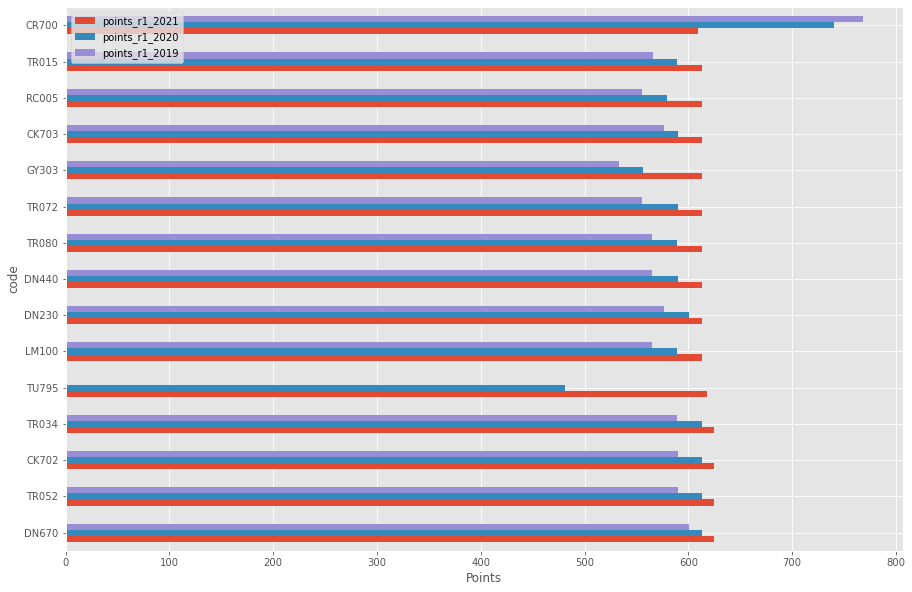

In [114]:
# Generating a barplot 
top_2021[~top_2021.title.str.contains('\(')].head(15) .plot.barh()

# Labeling y-axis 
plt.xlabel('Points')

# Adding a leggend
plt.legend(loc='upper left')

<br>

<br>

<br>

In [115]:
# Bottom 5 rows
top_2021.tail()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DB576,Film and Creative Media,6/7,101.0,7.0,NaN,100.0,6/7
TL780,Early Childhood Care and Education,6/7,100.0,7.0,234.0,NaN,6/7
DN401,Medicine - Graduate Entry (GAMSAT required),8,61.0,8.0,NaN,59.0,8
CK791,Medicine - Graduate Entry (GAMSAT required),8,60.0,8.0,57.0,58.0,8
LM101,Medicine - Graduate Entry (GAMSAT required),8,57.0,8.0,55.0,55.0,8


<br>

<br>

- There's a big drop in points for TL780 - 134. It will be interesting to see if the course is offered in 2022.

<br>

<br>

<br>

In [116]:
# Overview of 2021 points. 100 lowest & 625 highest points
stats_21 = allcourses[(allcourses['points_r1_2020'] >= 100) & (allcourses['points_r1_2020'] <= 625) ].describe().drop(['points_r1_2020', 'points_r1_2019'], axis=1)

stats_21

,points_r1_2021
count,1177.000000
mean,353.434155
std,120.612747
min,100.000000
25%,261.000000
50%,321.000000
75%,451.000000
max,718.000000


<br>

<br>

***

<br>

<br>

### Histogram

<br>

<br>

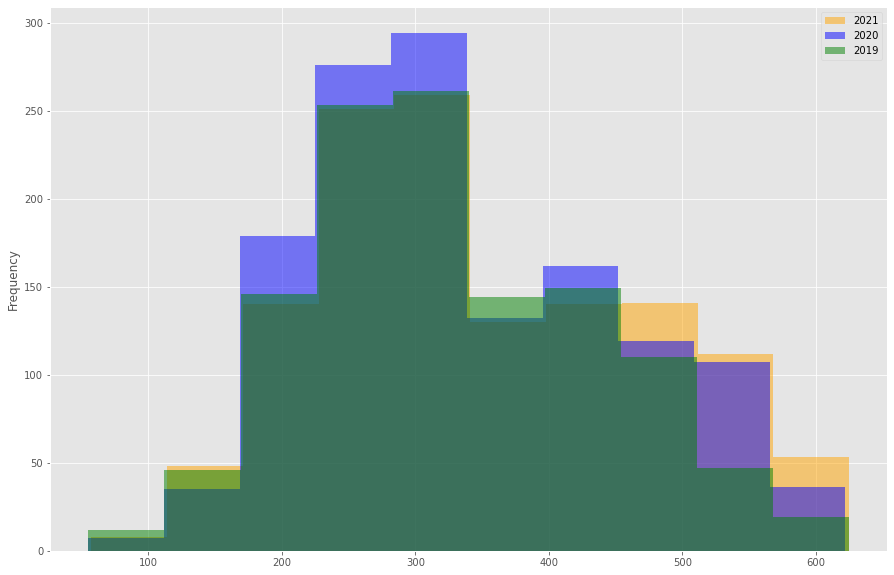

In [117]:
# Generating a histogram for points 
top_2021['points_r1_2021'].plot.hist(label='2021', bins=10, alpha=0.5, color='orange')
top_2020['points_r1_2020'].plot.hist(label='2020', bins=10, alpha=0.5, color='blue')
top_2019['points_r1_2019'].plot.hist(label='2019', bins=10, alpha=0.5, color='green')

# Adding a legend
plt.legend()

# Adding ticks to xaxis
#plt.xticks(np.arange(-500, 1650, step=150))

<br>

<br>

<br>

As we know which courses are level 8 for sure, we can check how these points have changed.

<br>

<br>

<AxesSubplot:ylabel='Frequency'>

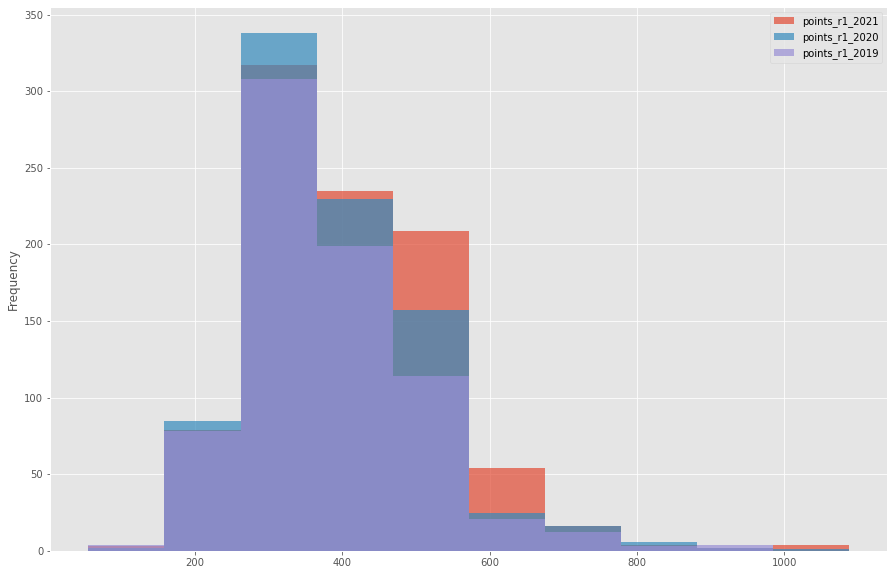

In [118]:
# Generating a histogram
level_8 = allcourses[allcourses['level_2021'] == '8' ].plot.hist(bins=10, alpha=0.7)
level_8

<br>

<br>

<br>

Some observations:

- The majority of courses require in and around 300 points.
- There is a rise in points across the board.
- The implementation of accredited points from 2020 seems to have had a big effect on the number courses which now require 450+ points. 
- Compared to 2019, the number of courses requiring 500+ points is over double.
- 2020 pushed up entry points requirements across the board and as a result the requirements for courses on the high points side increased to reconcile the inflation.

<br>

<br>

<br>

<br>

### Boxplot

<br>

Let's have another look at the distribution of the points now, we have removed major outliers i.e. points which exceed 625 points.

<br>

<br>

<AxesSubplot:>

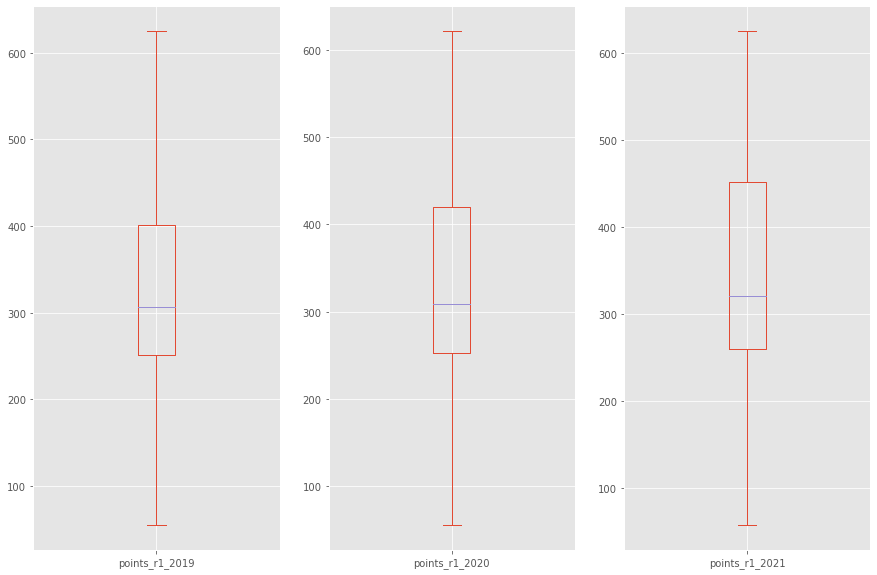

In [119]:
# Generating boxplots

# nrows, ncols, the first plot
plt.subplot(1,3,1)
(top_2019['points_r1_2019']).plot.box()

# nrows, ncols, the second plot
plt.subplot(1,3,2)
(top_2020['points_r1_2020']).plot.box()

# nrows, ncols, the thrid plot
plt.subplot(1,3,3)
(top_2021['points_r1_2021']).plot.box()

<br>

Some observations: 

- No major outliers, which makes sense.
- The median (blue line in the box) has increased with each subsequent year. 
-  The mean (box) has increased over the years too. 

<br>

Let's work out how the mean has changed over the 3 years.

<br>

In [120]:
# Getting average points for each
average_2019 = top_2019['points_r1_2019'].mean()
average_2020 = top_2020['points_r1_2020'].mean() 
average_2021 = top_2021['points_r1_2021'].mean()

<br>

<br>

<br>

In [121]:
# Getting the increase
avg_increase = average_2020 - average_2019

# Getting the %
increase_percent = (avg_increase/average_2019)*100

print('An increase of:', increase_percent)

An increase of: 3.501528290730442


<br>

<br>

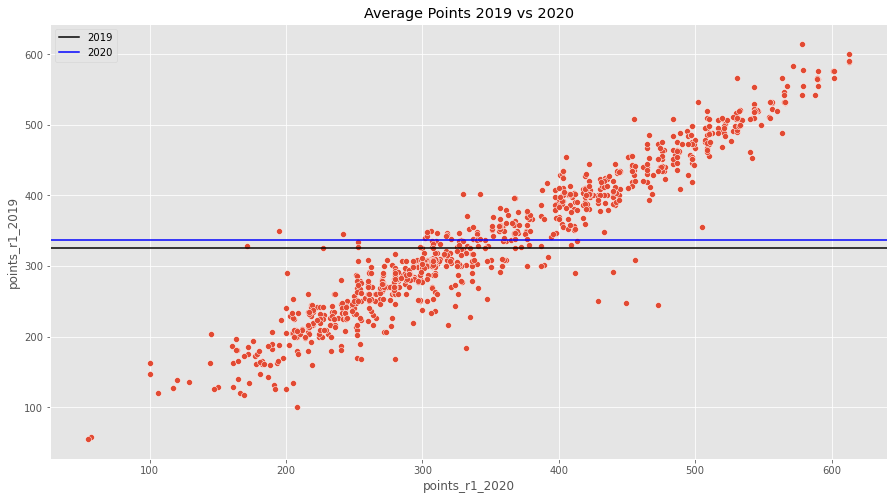

In [122]:
# Creating an figure
fig,ax = plt.subplots(figsize=(15,8))

# Generating a scatterplot
sns.scatterplot(x=top_2020['points_r1_2020'],y=top_2019['points_r1_2019'])

# Adding a title
plt.title("Average Points 2019 vs 2020")

# Adding lines to show average for 2019 and 2020
ax.axhline(top_2019['points_r1_2019'].mean(), linestyle="-", color="black", label='2019') 
ax.axhline(top_2020['points_r1_2020'].mean(), linestyle="-", color="blue", label='2020') 

# Adding a legend
plt.legend()

<br>

<br>

<br>

<br>

<br>

<br>

In [123]:
# Getting the increase
avg_increase = average_2021 - average_2020

# Getting the %
increase_percent = (avg_increase/average_2020)*100

print('An average increase of: {} between 2020 and 2021'.format(increase_percent))

An average increase of: 3.8598273466896362 between 2020 and 2021


<br>

<br>

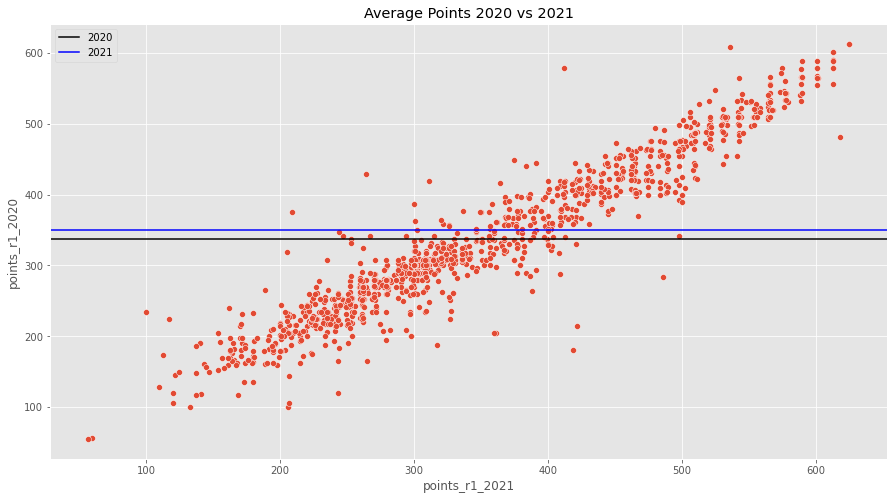

In [124]:
# Creating an figure
fig,ax = plt.subplots(figsize=(15,8))

# Generating a scatterplot
sns.scatterplot(x=top_2021['points_r1_2021'], y=top_2020['points_r1_2020'])

# Adding a title
plt.title("Average Points 2020 vs 2021")

# Adding lines to show average for 2019 and 2020
ax.axhline(top_2020['points_r1_2020'].mean(), linestyle="-", color="black", label='2020') 
ax.axhline(top_2021['points_r1_2021'].mean(), linestyle="-", color="blue", label='2021') 

# Adding a legend
plt.legend()

<br>

<br>

<br>

<br>

<br>

<br>

In [125]:
# Getting the increase
avg_increase = average_2021 - average_2019

# Getting the %
increase_percent = (avg_increase/average_2019)*100

print('An average increase of: {} between 2019 and 2021'.format(increase_percent))

An average increase of: 7.496508583937766 between 2019 and 2021


<br>

<br>

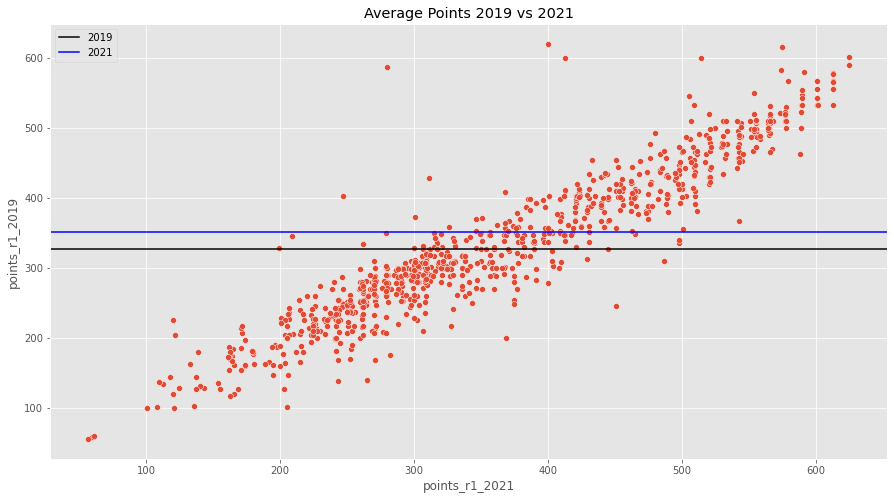

In [126]:
# Creating an figure
fig,ax = plt.subplots(figsize=(15,8))

# Generating a scatterplot
sns.scatterplot(x=top_2021['points_r1_2021'],y=top_2019['points_r1_2019'])

# Adding a title
plt.title("Average Points 2019 vs 2021")

# Adding lines to show average for 2019 and 2020
ax.axhline(top_2019['points_r1_2019'].mean(), linestyle="-", color="black", label='2019') 
ax.axhline(top_2021['points_r1_2021'].mean(), linestyle="-", color="blue", label='2021') 

# Adding a legend
plt.legend()

<br>

<br>

<br>

<br>

<br>

### Heatmap

<br>

In [127]:
corr = allcourses.corr()
corr

,points_r1_2021,points_r1_2020,points_r1_2019
points_r1_2021,1.000000,0.960016,0.910599
points_r1_2020,0.960016,1.000000,0.955069
points_r1_2019,0.910599,0.955069,1.000000


<br>

<br>

<AxesSubplot:>

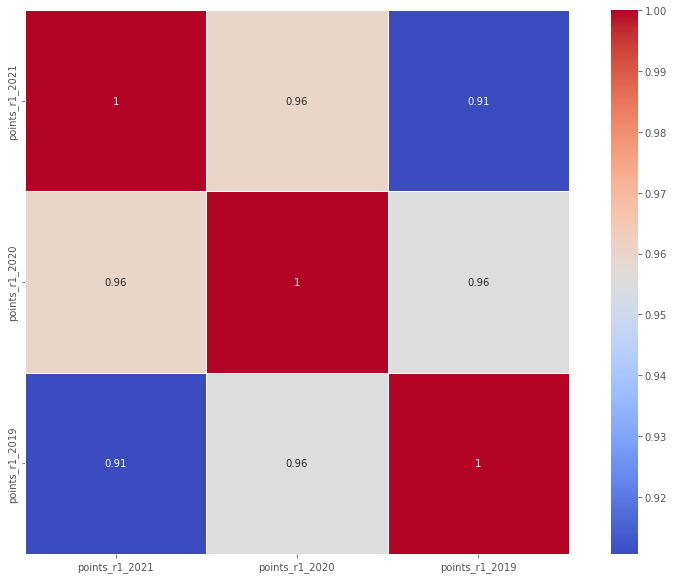

In [128]:
sns.heatmap(corr, annot=True, linewidth=1, cmap='coolwarm', square=True)

<br>

<br>

The heatmap is as expected in that sequent years are more related to each other that 2019 and 2021. It is interesting that 2020 is equal 0.96 in relation to both 2019 and 2021. The colour of the squares would suggest it has slightly more correlation with 2021's points. The output from the `.corr()` method above confirms this.

<br>

<br>

### Points Increase

<br>

So now we are certain that in the majority of cases, course points have risen over the past three years, let's try and work out by how much. 

<br>

<br>

In [129]:
# Getting sum points for each
sum_2019 = allcourses['points_r1_2019'].sum()
sum_2020 = allcourses['points_r1_2020'].sum() 
sum_2021 = allcourses['points_r1_2021'].sum()

<br>

In [130]:
# Getting the increase
sum_increase =  sum_2020 - sum_2019

# Getting the %
sum_percent = (sum_increase/sum_2019)*100

print('An increase of: {} between 2019 and 2020'.format(sum_percent))

An increase of: 16.311328209180374 between 2019 and 2020


<br>

<br>

In [131]:
# Getting the increase
sum_increase =  sum_2021 - sum_2019

# Getting the %
sum_percent = (sum_increase/sum_2019)*100

print('An increase of: {} between 2019 and 2021'.format(sum_percent))

An increase of: 14.051433086703542 between 2019 and 2021


<br>

<br>

In [132]:
# Getting the increase
sum_increase =  sum_2021 - sum_2020

# Getting the %
sum_percent = (sum_increase/sum_2020)*100

print('An increase of: {} between 2020 and 2021'.format(sum_percent))

An increase of: -1.9429707813262351 between 2020 and 2021


<br>

<br>

I'm not totally confident in these numbers, as I think we have to take into account that 2020 offered more courses than both 2019 and 2021 and this would make the points sum greater. I think this needs to be taken into consideration. I'm going to try another method of checking if points have risen between courses. 

<br>

Using the `.gt()` function we can return whether a value in one column is greater than a value in another column [22].  We have to specify which columns we want to compare using `.iloc[]`

<br>

In [133]:
# Checking  2020 against 2021
course_diff = allcourses.iloc[:,2].gt(allcourses.iloc[:,4],axis = 0)
course_diff

code
AL801    False
AL802    False
AL803     True
AL805    False
AL810     True
         ...  
SG403    False
SG432    False
TL712    False
TL719    False
TL746    False
Length: 1766, dtype: bool

<br>

<br>

In [134]:
# Checking a random row
course_diff.iloc[200]

True

<br>

Let's check the total 

<br>

In [135]:
# How many courses increased points (True) Vs didn't (False)
diff_count = course_diff.value_counts()
diff_count

False    921
True     845
dtype: int64

<br>

<br>

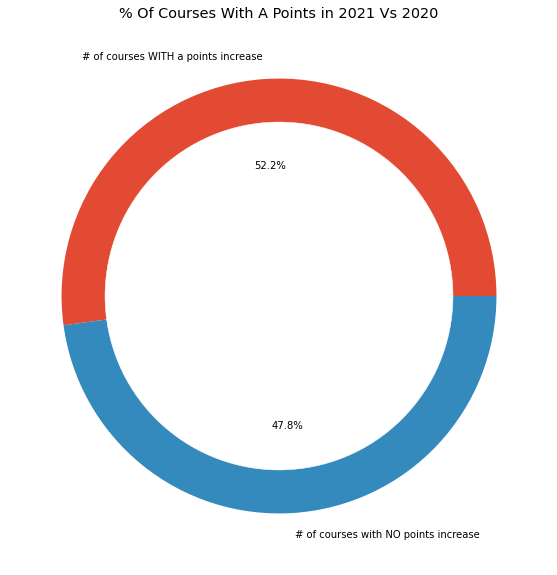

In [136]:
# Setting Labels
diff_count_labels = ['# of courses WITH a points increase', '# of courses with NO points increase']

# Generating a piechart
plt.pie(diff_count, labels=diff_count_labels, autopct='%1.1f%%') # Data, lables, colours, %

# Adding a title
plt.title("% Of Courses With A Points in 2021 Vs 2020")

# Adding a circle at the center to make it a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')

# Current figure
p=plt.gcf()
p.gca().add_artist(my_circle)

<br>

<br>

We can see that 52.2% of courses offered in 2021 increased in points over courses in 2020.

<br>

In [253]:
# Getting skew and kurtosis for 2021 points
print("2021 points skewness: %f" % allcourses['points_r1_2021'].skew())
print("2021 points kurtosis: %f" % allcourses['points_r1_2021'].kurt())

# Formatting
print('******************************')

# Getting skew and kurtosis for 2020 points
print("2020 points skewness: %f" % allcourses['points_r1_2020'].skew())
print("2020 points kurtosis: %f" % allcourses['points_r1_2020'].kurt())

# Formatting
print('******************************')

# Getting skew and kurtosis for 2019 points
print("2019 points skewness: %f" % allcourses['points_r1_2019'].skew())
print("2019 points kurtosis: %f" % allcourses['points_r1_2019'].kurt())

2021 points skewness: 0.844959
2021 points kurtosis: 1.103898
******************************
2020 points skewness: 1.134000
2020 points kurtosis: 2.156431
******************************
2019 points skewness: 1.217851
2019 points kurtosis: 2.656230


In [ ]:
# plot the four datasets on the same graph
sns.lmplot('x', 'y', data=df, fit_reg=False, hue='dataset')

<br>

***
## Conculsion
***


<br>

- `Pandas` is an extremely robust and powerful software for analysing and manipulating data. 
- We can say that the introduction of accredited grades has led to an inflation in CAO entry point requirements. 
- The big rise in 2020 seems to have pushed points up across the board with courses now compensating for the inflation by increasing their points entry requirements.
- 52.2% of 2021's course point requirements were increased from 2020.
- Out of the three years, 2020 had the most courses on offer for candidates.
- For all years, the majority of courses required within the region of 300-375 points.
- Three of the top 15 courses in 2019, were not offered in 2021.
- The data for all years can be skewed by courses requiring additionally entry requirements e.g., Medicine being 50 points but outside of the CAO needed a GAMSAT or other courses needed an interview, audition or portfolio which added to their totals and pushed points beyond 625 - which is the highest a student can achieve from a leaving cert exam alone.
- The top courses in 2020 ran over multiple years.
- The top 4 courses in 2020 and 2021 stayed the same.
- There was a point rise across the board in 2020. 
- The “mid-level” courses had a substantial increase, just under double the amount of courses requiring 350+ points.
- In 2021, the number of courses requiring 500+ points is over double from 2029.

<br>

<br>

***

## References

***

<br>

[1].	College application and entrance requirements [Internet]. Citizensinformation.ie. [cited 2021 Dec 2]. Available from: https://www.citizensinformation.ie/en/education/third_level_education/applying_to_college/application_procedures_and_entry_requirements.html
 	 
[2]	CAO Handbook 2022 [Internet]. Proactive.ie. [cited 2021 Nov 7]. Available from: https://flipbook.proactive.ie/view/959938320/2/
 	 
[3]	Wikipedia contributors. Central Applications Office [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Dec 2]. Available from: https://en.wikipedia.org/w/index.php?title=Central_Applications_Office&oldid=1031228739
 	 
[4]	Python Requests Module [Internet]. W3schools.com. [cited 2021 Dec 2]. Available from: https://www.w3schools.com/python/module_requests.asp
 	 
[5]	Wikipedia contributors. Regular expression [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Dec 2]. Available from: https://en.wikipedia.org/w/index.php?title=Regular_expression&oldid=1057425717
 	 
[6]	Python Urllib Module [Internet]. Geeksforgeeks.org. 2018 [cited 2021 Dec 3]. Available from: https://www.geeksforgeeks.org/python-urllib-module/
 	 
[7] 	How to use urlretrieve in Python 3 [Internet]. Programmer.ink. [cited 2021 Dec 3]. Available from: https://programmer.ink/think/how-to-use-urlretrieve-in-python-3.html
 	 
[8] 	Unzipping files in Python [Internet]. Stackoverflow.com. [cited 2021 Dec 3]. Available from: https://stackoverflow.com/questions/3451111/unzipping-files-in-python
 	 
[9]	Boyle T. The Python Glob Module [Internet]. Towards Data Science. 2021 [cited 2021 Dec 3]. Available from: https://towardsdatascience.com/the-python-glob-module-47d82f4cbd2d
 	 
[10]	Combining DataFrames with pandas – data analysis and visualization in python for ecologists [Internet]. Datacarpentry.org. [cited 2021 Dec 6]. Available from: https://datacarpentry.org/python-ecology-lesson/05-merging-data/
 	 
[11]	What does inplace mean in Pandas? [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Dec 6]. Available from: https://www.geeksforgeeks.org/what-does-inplace-mean-in-pandas/
 	 
[12]	Sharma M. Pandas Index Explained [Internet]. Towards Data Science. 2019 [cited 2021 Dec 6]. Available from: https://towardsdatascience.com/pandas-index-explained-b131beaf6f7b
 	 
[13].	Python R. Combining Data in Pandas With merge(), .join(), and concat() [Internet]. Realpython.com. Real Python; 2020 [cited 2021 Dec 6]. Available from: https://realpython.com/pandas-merge-join-and-concat/
 	 
[14]	Lee W-M. Joining Pandas DataFrames [Internet]. Towards Data Science. 2021 [cited 2021 Dec 6]. Available from: https://towardsdatascience.com/joining-pandas-dataframes-472e4a045bac
 	 
[15]	Wikipedia contributors. Leaving Certificate (Ireland) [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Dec 8]. Available from: https://en.wikipedia.org/w/index.php?title=Leaving_Certificate_(Ireland)&oldid=1056259798
 	 
[16]	Libreri S. Leaving Cert portal deadline extended as 98% register [Internet]. RTÉ. 2020 [cited 2021 Dec 8]. Available from: https://www.rte.ie/news/education/2020/0528/1143237-leaving-cert/
 	 
[17]	Independent. ie Newsdesk. Leaving Cert Results: How 2021 grades compare to previous years – and a reminder of the 2020 CAO points. Irish independent [Internet]. 2021 Sep 3 [cited 2021 Dec 8]; Available from: https://www.independent.ie/irish-news/education/leaving-cert-how-2021-grades-compare-to-previous-years-and-a-reminder-of-the-2020-cao-points-40814264.html
 	 
[18]	seaborn.kdeplot — seaborn 0.11.2 documentation [Internet]. Pydata.org. [cited 2021 Dec 8]. Available from: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
 	 
[19]	ajaytech. KDE plots - Ajay tech [Internet]. Ajaytech.co. 2020 [cited 2021 Dec 8]. Available from: https://ajaytech.co/2020/05/03/kdeplots/
 	 
[20]	seaborn.pairplot — seaborn 0.11.2 documentation [Internet]. Pydata.org. [cited 2021 Dec 9]. Available from: https://seaborn.pydata.org/generated/seaborn.pairplot.html
 	 
[21]	Python [Internet]. Geeksforgeeks.org. 2018 [cited 2021 Dec 10]. Available from: https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/
 	 
[22]	pandas.DataFrame.ge — pandas 1.3.5 documentation [Internet]. Pydata.org. [cited 2021 Dec 13]. Available from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ge.html
 	 
[23]	Python R. Plot with pandas: Python data visualization for beginners [Internet]. Realpython.com. Real Python; 2020 [cited 2021 Dec 14]. Available from: https://realpython.com/pandas-plot-python/
 	 
[24]	Python [Internet]. Geeksforgeeks.org. 2018 [cited 2021 Dec 14]. Available from: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
 	 
[34] gamsatpreparationcoursesireland. Ireland’s Medical schools: GAMSAT scores, cuttoffs and GPAs [Internet]. Gamsatpreparationcoursesireland.ie. [cited 2021 Dec 29]. Available from: https://www.gamsatpreparationcoursesireland.ie/gamsat-ireland-irishmedicalschools/

<br>

#### Other References Used (Code Solution Help)


<br>


[25] 	Fix OSError: Unable to locate Ghostscript on paths for Python Beginners - Python Tutorial [Internet]. Tutorial Example. 2019 [cited 2021 Dec 16]. Available from: https://www.tutorialexample.com/fix-oserror-unable-to-locate-ghostscript-on-paths-for-python-beginners-python-tutorial/
 	 
[26] 	Du F. Extract tabular data from PDF with Camelot Using Python [Internet]. Youtube; 2019 [cited 2021 Dec 16]. Available from: https://www.youtube.com/watch?v=LoiHI-IB3lY
 	 
[27] 	How to move a column to first position in pandas DataFrame? [Internet]. GeeksforGeeks. 2021 [cited 2021 Dec 16]. Available from: https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
 	 
[28]	How to remove special characers from a column of dataframe using module re? [Internet]. Stack Overflow. [cited 2021 Dec 16]. Available from: https://stackoverflow.com/questions/33257344/how-to-remove-special-characers-from-a-column-of-dataframe-using-module-re
 	 
[29]	Pandas: To_numeric for multiple columns [Internet]. Stack Overflow. [cited 2021 Dec 16]. Available from: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
 	 
[30]	Pandas: change data type of Series to String [Internet]. Stack Overflow. [cited 2021 Dec 16]. Available from: https://stackoverflow.com/questions/22231592/pandas-change-data-type-of-series-to-string
 	 
[31]	Regex symbol list and regex examples [Internet]. Codexpedia.com. [cited 2021 Dec 16]. Available from: https://www.codexpedia.com/regex/regex-symbol-list-and-regex-examples/
 	 
[32]	JupyterLab Notebook cells going missing [Internet]. Stack Overflow. [cited 2021 Dec 16]. Available from: https://stackoverflow.com/questions/68994024/jupyterlab-notebook-cells-going-missing
 	 
[33]	How to select rows in Pandas dataframe based on string matching in multiple columns [Internet]. Stack Overflow. [cited 2021 Dec 16]. Available from: https://stackoverflow.com/questions/58559581/how-to-select-rows-in-pandas-dataframe-based-on-string-matching-in-multiple-colu
 	 


<br>

### Images

- [README Header](https://agile.com.np/wp-content/uploads/2020/12/data-analytics-image-big-data.jpg)
- [CAO Logo](https://www.icareer.ie/wp-content/uploads/2016/12/Untitled-1.jpg)
- [Points](https://www.irishtimes.com/polopoly_fs/1.3596890!/image/image.jpg)
- [Concat](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)
- [Join](https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png?ezimgfmt=ng:webp/ngcb1)
- [Covid](https://www.bswrehab.com/-/media/project/baylorrehab/dotcom/usa/images/about-us/in-the-news/covid19visitationpolicy.jpg?h=256&iar=0&w=256&t=20200926000839&hash=B45A283413C03E8AFECD850719453F0F)

<br>

***

<br>

# End